In [1]:
# test dataset creation functions.

In [1]:
from datasets import *

# Create precip weighted dataset

In [2]:
base_folder = "Datasets"
output_folder = "Output/"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = True


description["TIMESCALE"] = "YEARLY"

In [3]:
create_precip_weighted_dataset(description, base_folder, output_folder)

loading variables
dict_keys(['t', 'longitude', 'latitude', 'level-1_5', 'd18O'])


C:\Users\49159\Anaconda3\envs\GrouPyTorch\lib\site-packages\numpy\ma\extras.py:626: RuntimeWarning: invalid value encountered in multiply
  wgt = wgt*(~a.mask)


dict_keys(['t', 'longitude', 'latitude', 'surface', 'tsurf'])
dict_keys(['t', 'longitude', 'latitude', 'surface', 'prec'])
writing pickle
done
writing dataset description
done


In [6]:
import gzip
import pickle

In [8]:
with gzip.open("Output/dset_-0x601b2af7f878e831/dataset.gz", 'r') as f:
    a = pickle.load(f)

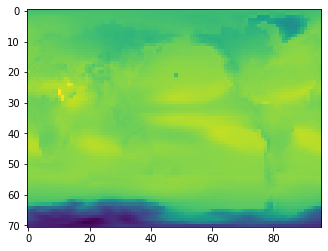

In [18]:
import matplotlib.pyplot as plt
plt.imshow(np.mean(a["train"]["targets"][:,0,...],axis=0))

In [13]:
a["train"]["predictors"].shape

(899, 2, 71, 96)

# Create yearly dataset

In [3]:
base_folder = "Datasets_old"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "temp", 
                                "precip"]

description["PREDICTOR_VARIABLES"] = {"temp": ["temp_1"],
                                      "precip": ["precip"]}

description["TARGET_VARIABLES"] = {"isotopes": ["dO18"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "temp", 
                                   "precip", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1, -1] # slicing array. To use no slice, use [None, None]. Otherwise sth like [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [4]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
writing pickle


KeyboardInterrupt: 

## Create yearly dataset - new climate model data

In [19]:
#new hadcm3
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec",
                                   ] # "slp"

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1, -1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [20]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
writing pickle
done
writing dataset description
done


In [22]:
import gzip
import pickle
with gzip.open("Output/dset_0x4e84a9c3234fde02/dataset.gz", 'r') as f:
    a = pickle.load(f)
    
a["train"]["predictors"].shape

(900, 2, 71, 96)

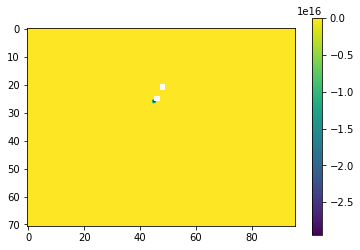

In [28]:
plt.imshow(np.mean(a["train"]["predictors"][:,1,...],axis=0))
plt.colorbar()

In [10]:
#new other models
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec",
                                   ] # "slp"

description["CLIMATE_MODEL"] = "ECHAM5"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [None, None]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [11]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
writing pickle
done
writing dataset description
done


# Create monthly dataset

In [1]:
from datasets import *

In [2]:
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

loading variables
dict_keys(['d18O'])
writing pickle


In [ ]:
import netCDF4 as nc

a = nc.Dataset("Datasets/iHadCM3/Original/isotopes.nc")

In [ ]:
iso = a.variables["d18O"]

In [ ]:
iso.missing_value